# Bayesian networks



# 1 - The Bayesian network model

Most real-world problems imply dealing with uncertainty. This is a consequence of several factors such as partial information, stochastic environments, and measurement errors. Probability theory provides a well-established foundation for managing uncertainty, therefore it is natural to use it for reasoning under these conditions. However, if we na ̈ıvely apply probability to complex problems, we will soon be deterred by the resulting computational complexity.

Probabilistic graphical models (PGMs) provide a computationally efficient framework for managing uncertainty that combines probability theory with graph theory. The main idea is to consider only those conditional probabilistic independence relations that are held in the problem data and encode them in a graph. By using a PGM, we can compactly and clearly represent the joint probability distribution (JPD) of the data, graphically representing relevant relationships between the problem variables.

We distinguish two components in a PGM: 
* **The graphical structure**. Nodes correspond to random variables and arcs correspond to probabilistic dependences between them.

* **The probabilistic content**. It quantifies these dependences using conditional probabilistic distributions (CPDs). 

In a PGM, the JPD is factorized according to the graphical structure as a product of its CPDs, which reduces the total number of model parameters and facilitates the computation of probabilistic queries.

Depending on the type of graphical structure, we can distinguish three main families of PGMs:

* **Markov networks**, which assume an unidrected graph to represent relations between the problem variables.

* **Bayesian networks** (BNs), which assume a directed acyclic graph

* **Chain graphs**, which admit both directed and undirected arcs, but without any directed cycles.

We are going to focus on BNs, as they are the most widely used PGM for reasoning with uncertainty.


We can distinguish two components in a BN:

1. A directed acyclic graphical structure that encodes conditional independence relations between the different variables
2. A set of parameters that, together with the graphical structure, define a unique distribution

## 1.1 - Encoding independences

Let $P$ be a probability distribution with $\mathbf{X}_{A}$, $\mathbf{X}_{B}$ and $\mathbf{X}_{C}$ as three disjoint sets of variables. We say that $\mathbf{X}_{A}$ and $\mathbf{X}_{B}$ are conditionally independent given $\mathbf{X}_{C}$ if

$$
\begin{equation*}
P(\mathbf{X}_{A}, \mathbf{X}_{B} | \mathbf{X}_{C}) = P(\mathbf{X}_{A} | \mathbf{X}_{C}) P (\mathbf{X}_{B} | \mathbf{X}_{C}) \ 
\end{equation*}
$$

and we denote this statement by $(\mathbf{X}_{A} \perp \mathbf{X}_{B} | \mathbf{X}_{C})$. As an example, the BN structure depicted in *Figure 1* implies several conditional independence statements over its set of variables $\{X_{1}, X_{2}, X_{3}, X_{4}, X_{5}\}$: $(X_{1} \perp X_{2})$, $(X_{3} \perp \{X_{2}, X_{4}\} | X_{1})$, $(X_{4} \perp \{X_{3}, X_{5}\}| \{X_{1}, X_{2}\})$ and $(X_{5} \perp \{X_{1}, X_{2}, X_{4}\} | X_{3})$. 

<table>
<tr>
  <td>
    <img src="./images_1/bn_example.png" alt="Example of a conditional linear Gaussian BN." width="800">
  </td>
</tr>
<tr>
<i><b>Figure 1.</b> Example of a conditional linear Gaussian BN. Blue nodes represent categorical variables and red nodes represent continuous variables.</i>
</tr>
</table>

We see a pattern emerging from the independence statements of this example: the parents of a variable "shield" it from the probabilistic influence of other variables that are not its descendants. We can formalize this intuition. 

Let $\mathcal{G}$ be a DAG whose nodes represent a set of random variables $\mathbf{X}$. Let $\mathbf{Pa}_{i}^{\mathcal{G}}$ denote the parents of $X_{i}$ in $\mathcal{G}$, and $\text{NonDescendants}_{X_{i}}$ denote the variables in the graph that are nondescendants of $X_{i}$. Then $\mathcal{G}$ encodes the following set of conditional independence statements, called the local Markov independences, and denoted by $\mathcal{I}_{l}(\mathcal{G})$:
\begin{equation*}
\forall X_{i} : \ (X_{i} \perp \text{NonDescendants}_{X_{i}} | \mathbf{Pa}_{i}^{\mathcal{G}}) \ .
\end{equation*}

The ability to infer conditional independences from a graph allows us to characterize the notion of Markov Blanket (MB). The MB of any variable $X_{i} \in \mathbf{X}$ in $\mathcal{G}$ is the set of variables composed of the parents of $X_{i}$, its children and the parents of its children.

In general there are multiple conditional independence statements that can be derived from $\mathcal{I}_{l}(\mathcal{G})$. The notion of d-separation can be used to determine whether a specific statement $(\mathbf{X}_{A} \perp \mathbf{X}_{B} | \mathbf{X}_{C})$ holds. Let $\mathbf{X}_{A}$, $\mathbf{X}_{B}$ and $\mathbf{X}_{C}$ be three disjoint sets of nodes in a DAG $\mathcal{G}$. Let $\mathbf{T}$ be the set of possible trails from any node $X_{a} \in \mathbf{X}_{A}$ to any node $X_{b} \in \mathbf{X}_{B}$, where a trail in the graph is a succession of arcs, independent of their directions. Then $\mathbf{X}_{C}$ blocks a trail $T_{I} \in \mathbf{T}$ if one of the following holds:

1. $T_{I}$ contains a chain $T_{i-1} \rightarrow T_{i} \rightarrow T_{i+1}$ such that $T_{i} \in \mathbf{X}_{C}$.

2. $T_{I}$ contains a fork $T_{i-1} \leftarrow T_{i} \rightarrow T_{i+1}$ such that $T_{i} \in \mathbf{X}_{C}$.

3. $T_{I}$ contains a collider $T_{i-1} \rightarrow T_{i} \leftarrow T_{i+1}$ such that $T_{i}$ and any of its descendants <b>do not belong</b> to $\mathbf{X}_{C}$.

If all the trails in $\mathbf{T}$ are blocked by $\mathbf{X}_{C}$, then $\mathbf{X}_{C}$ d-separates $\mathbf{X}_{A}$ and $\mathbf{X}_{B}$. It is important to note that d-separation does not rule out additional conditional independences that may hold in the distribution and are not encoded by the DAG. For example, if $\mathbf{X}_{A}$ and $\mathbf{X}_{B}$ are d-separated given $\mathbf{X}_{C}$, then $(\mathbf{X}_{A} \perp \mathbf{X}_{B} | \mathbf{X}_{C})$ holds in the distribution $P$. However, a lack of d-separation does not necessarily indicate that $(\mathbf{X}_{A} \perp \mathbf{X}_{B} | \mathbf{X}_{C})$ does not hold in $P$. Finally, d-separation can be efficiently computed in time that is linear in the number of nodes in the graph ([Geiger et al, 1990](https://ftp.cs.ucla.edu/pub/stat_ser/r116.pdf)).

Since we are interested in DAGs that encode a JPD, we now define the relation between the topological properties of a DAG and the conditional independences  of its underlying probability distribution. We say that a DAG $\mathcal{G}$ is an independence map (I-map) of the distribution $P$ if all the conditional independences that can be derived from $\mathcal{I}_{l}(\mathcal{G})$ are satisfied by $P$. We can now formally define the BN model.

## 1.2 - Model definition

A BN $\mathcal{B} = (\mathcal{G}, \mathbf{\theta})$ is a representation of a JPD over a set of random variables $\mathbf{X}$. It consists of two components: (i) a DAG $\mathcal{G}$ that encodes the conditional independences $\mathcal{I}_{l}(\mathcal{G})$, and (ii) a set of parameters $\mathbf{\theta}$ that describes the CPD $P(X_{i} | \mathbf{Pa}^{\mathcal{G}}_{i})$ of each variable $X_{i} \in \mathbf{X}$ given its parents in the graph. In addition, we require that $\mathcal{G}$ is an I-map of the JPD $P$ represented by the BN. This property is key for allowing the BN to compactly factorize the JPD as a product of CPDs. It is formally expressed by the following theorem:

----

**Theorem 2.1** Let $\mathcal{G}$ be a BN graph over the set of variables $\mathbf{X}$. We say that $\mathcal{G}$ is an I-map of $P$ if and only if $P$ can be expressed as
$$
\begin{equation}
	P(\mathbf{X}) = \prod_{i} P(X_{i} | \mathbf{Pa}_{i}^{\mathcal{G}}) \ . \ \ \ \ \ (2.1)
\end{equation}
$$

----

Using this theorem, a BN is able to define a unique probability distribution that can be written as in Equation (2.1). This is called the chain rule for Bayesian networks. As an example, consider the distribution $P(X_{1},X_{2},X_{3},X_{4},X_{5})$ of Figure 1. By taking into account the conditional independences represented by the graph, we can write:
$$
\begin{equation*}
P(X_{1},X_{2},X_{3},X_{4},X_{5}) = P(X_{1})P(X_{2})P(X_{3}|X_{1})P(X_{4}|X_{1},X_{2})P(X_{5}|X_{3}) \ .
\end{equation*}
$$

## 1.3 - Parametrization

Depending on the nature of variables that are present in a BN, we usually distinguish between categorical, continuous, and hybrid (i.e., mixed) BNs. The latter is composed of both categorical and continuous variables. Each of these is presented in the following sections.

### 1.3.1 - Categorical Bayesian networks

Categorical BNs are strictly composed of categorical variables (i.e., qualitative variables with a finite number of values). Examples include variables such as sex, eye color, blood type, and many others. However, discrete variables with a finite number of values can also be used (e.g., number of children in a family, number of tests in an experiment, etc.). 


----

**Note:** The terms "categorical" and "discrete" are usually used indiscriminately in the BN literature. For simplicity, we are going to refer to both types of variables as categorical variables. 

----


The natural choice for modelling categorical variables is the **categorical distribution**. The categorical distribution is a generalization of the Bernoulli distribution that allows more than two possible values. This distribution provides several advantages to categorical BNs. 

1. All of the CPDs are categorical distributions, which simplifies computations. 

2. Each CPD can be represented in tabular form, where every assignment of a variable and its parents has a designated probability. 

3. They are easily interpretable due to a direct representation of the BN parameters as probabilities. 

All these benefits make categorical BNs the most common parametrization in the literature ([Darwiche, 2009](https://www.cambridge.org/core/books/modeling-and-reasoning-with-bayesian-networks/8A3769B81540EA93B525C4C2700C9DE6)). 

As an example, consider the CPD $P(X_{4}|X_{1}, X_{2})$ of Figure 1. In this example, $X_{4}$ takes two possible values $\{t,f\}$, and their respective probabilities depend on the assignment of parent variables $X_{1}$ and $X_{2}$. One problem, however, arises from using this representation: the number of parameters in a categorical CPD increases exponentially with respect to the number of parents, which limits the complexity of the model.

### 1.3.2 - Continuous Bayesian networks

Continuous BNs are strictly composed of continuous variables (i.e., quantitative variables with an uncountable number of values). Examples include variables such as age, weight, blood pressure and many others. 

In this section, we describe how continuous variables can be integrated into the BN framework. More specifically, we are ging to dicuss the following approaches:

* **Discretization**, which simply transforms continuous variables into categorical variables.

* **Linear Gaussian BN**, which is composed of linear Gaussian CPDs and it is the most commonly used approach.

* Other semiparametric and nonparametric approaches that are not based on the Gaussian distribution.

#### Discretization

Given the desirable properties of categorical BNs, it is natural to bin continuous variables into a finite set of intervals. Two types of discretization techniques can be distinguished ([Fu, 2005](https://ir.vanderbilt.edu/bitstream/handle/1803/14997/ms_thesis.pdf?sequence=1)):

* Prediscretization methods, which discretize the data prior to the definition or learning of the BN. Due to the pertinence of these methods to most machine learning algorithms, a great deal of research has focused on this area ([Liu et al, 2002](https://link.springer.com/content/pdf/10.1023/a:1016304305535.pdf)).

* Integrated methods, which employ a greedy iterative search that alternates between BN structure learning and discretization. They are more computationally expensive than prediscretization methods, but they have also shown better results at modelling the data ([Friedman and Goldzsmidt, 1996](https://ai.stanford.edu/people/nir/Papers/FrG2.pdf); [Monti et al., 1998](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=de2d762447a8c8b7d3516317ee351426a9142d66))

Discretization is still an active research topic and different strategies can be applied to different types of data (Nojavan et al., 2017; Benzen et al., 2018).

The main drawback of discretizing continuous variables is that it unavoidably results in loss of information. All variation within

#### Linear Gaussian Bayesian networks

The most commonly used parametric form for continuous density functions is the Gaussian distribution. The Gaussian distribution is a member of the exponential family that makes very strong assumptions, such as the exponential decay of the distribution away from its mean, and the linearity of interactions between its variables. While these assumptions are often invalid, the Gaussian distribution has proven to be a surprisingly good approximation for many real-world distributions ([Kotz et al., 2004](https://onlinelibrary.wiley.com/doi/book/10.1002/0471722065)).

In a linear Gaussian BN ([Shachter and Kenley, 1989](https://www.jstor.org/stable/pdf/2632102.pdf?casa_token=AQGmkf9fEf8AAAAA:5wqGIdwL3RNxYSaASruPaaybM_Pbd-P9_u6QLXPeeAncOMIe0JZnWCI_wK-vRXa9HlwbFVk_oyauWv8MsHflEdyTeW4tG1LqfXlF5aMIdAwo-eXaSZU)), all of its variables are continuous and all of its CPDs are linear Gaussians. Let $X$ be a continuous variable with continuous parents $\mathbf{C} = \{C_{1},\dots, C_{k}\}$. We say that $X$ has a linear Gaussian CPD if there are parameters $\beta_{0},\dots,\beta_{k}$ and $\sigma^{2}$ such that

\begin{equation*}
P(X|\mathbf{C}) = \mathcal{N}(\beta_{0} + \sum_{i=1}^{k}\beta_{k}C_{i}; \sigma^{2}) \ .
\end{equation*}

From this formulation we can see that $X$ follows a Gaussian distribution with a mean that is linear in the values of its parent variables $\mathbf{C}$ and with a variance $\sigma^{2}$. An important result of this formulation is that linear Gaussian BNs are an alternative representation for the class of multivariate Gaussian distributions and vice versa. 

As an example, consider the conditional distribution $P(X_{5}|X_{3})$ of Figure 1. In this example, $X_{5}$ has a continuous parent, $X_{3}$, and follows a linear Gaussian distribution with parameters $\beta_{0} = 2.0$, $\beta_{1} = 10.5$ and $\sigma^{2} = 1.25$. Linear Gaussian BNs are widely used in the continuous domain due to their support of efficient inference ([Koller and Friedman, 2009](https://mitpress.mit.edu/9780262013192/probabilistic-graphical-models/)) and learning ([Geiger and Heckerman, 1994](https://arxiv.org/pdf/1302.6808)).

#### Other approaches

Some researchers have investigated the use of richer (semiparametric or nonparametric) models for representing nonlinear dependencies in BNs with continuous variables. These include kernel estimators ([Hoffmann and Tresp, 1995](https://proceedings.neurips.cc/paper_files/paper/1995/file/a5e0ff62be0b08456fc7f1e88812af3d-Paper.pdf)), neural networks ([Monti and Cooper, 1997](https://proceedings.neurips.cc/paper/1996/file/285ab9448d2751ee57ece7f762c39095-Paper.pdf); [Choi et al., 2018](https://www.sciencedirect.com/science/article/pii/S0888613X19301835)), and Gaussian processes ([Friedman and Nachman, 2000](https://arxiv.org/pdf/1301.3857)). While these approaches may result in a better representation of the underlying probability distribution, they have several disadvantages: 
1. they are harder to interpret due to their use of models that are opaque to humans
2. they do not usually allow efficient inference or learning.

### 1.3.3 - Hybrid Bayesian networks

Hybrid BNs are composed of both categorical and continuous variables. So far we have discussed the relations between variables of the same type, categorical or continuous. We have shown that in the case of categorical variables, the categorical distribution is the natural CPD. In addition, for continuous variables, we have shown the advantages of the linear Gaussian CPD. We can extrapolate this knowledge to hybrid BNs when both the parents and the children are categorical or continuous. However, there are two new types of relations that we need to address: 
1. A continuous variable with continuous and categorical parents.
2. A categorical variable with continuous and categorical parents.

#### A continuous variable with continuous and categorical parents

The simplest way of making a continuous variable depend on a categorical variable is to define a different set of parameters for every value of the categorical parent. While there is no restriction about the parametric form of the continuous variable, we have previously shown the advantages of the linear Gaussian distribution. If we restrict our attention to linear Gaussians, we get a class of hybrid BNs called the conditional linear Gaussian BN ([Lauritzen and Wermuth, 1989](https://www.jstor.org/stable/pdf/2241503.pdf?casa_token=Qi7YD4aDU_AAAAAA:LQjz8WpSkx1RJHB7Wo7Zj6bdxrsiex2fvn2o-jFEbx-qNapcMqUJtjihHJjpbVgyTZqwgFFL-ECdi_uJKW2RxAayhb5HpZvHpXYBFC1rTBIP08B-CQ8)), where every categorical variable has only categorical parents and every continuous variable has a conditional linear Gaussian CPD. Let $X$ be a continuous variable, where $\mathbf{C} = \{C_{1},\dots, C_{k}\}$ are its continuous parents and $\mathbf{D} = \{D_{1},\dots, D_{l}\}$ are its categorical parents. We say that $X$ has a conditional linear Gaussian CPD if for every $\mathbf{d} \in \Omega_{\mathbf{D}}$ (where $\Omega_{\mathbf{D}}$ represents all the joint assignments to $\mathbf{D}$) there are parameters $\beta_{\mathbf{d},0},\dots,\beta_{\mathbf{d},k}$ and $\sigma^{2}_{\mathbf{d},}$ such that
\begin{equation*}
P(X|\mathbf{C},\mathbf{d}) = \mathcal{N}(\beta_{\mathbf{d},0} + \sum_{i=1}^{k}\beta_{\mathbf{d},i}C_{i}; \sigma^{2}_{\mathbf{d}}) \ .
\end{equation*}

This CPD can be represented in tabular form, where every assignment of the categorical parent variables has an associated linear Gaussian. As an example, consider the conditional distribution $P(X_{3} | X_{1})$ of Figure 1. In this example, $X_{3}$ has categorical parent (i.e., $X_{1}$) and follows a conditional linear Gaussian distribution with two sets of parameters. When $X_{1} = t$, then $X_{3}$ follows $\mathcal{N}(3.5;0.75)$, and when $X_{1} = f$, then $X_{3}$ follows $\mathcal{N}(0.5; 0.05)$. In addition, we can see that a linear Gaussian distribution is simply a conditional linear Gaussian distribution with no categorical parents and a single set of parameters. This is the case of $P(X_{5} | X_{3})$. It follows that the JPD represented by a conditional linear Gaussian BN is a mixture of Gaussians where every mixture component corresponds to an instantiation of the categorical variables.

#### A categorical variable with continuous and categorical parents

Note that the definition of conditional linear Gaussian does not allow for categorical variables to have continuous parents. In order to overcome this restriction, [Koller et al. (1999)](https://arxiv.org/pdf/1301.6709) proposed to model the CPDs of categorical variables with continuous parents using the soft-max function. This model is usually referred to as the augmented conditional linear Gaussian BN. Unfortunately there is no exact inference for this type of BN ([Lerner and Parr, 2001](https://arxiv.org/pdf/1301.2288)), but we can always resort to the use of approximate inference ([Murphy, 1999](https://arxiv.org/pdf/1301.6724)).

A completely different approach to the hybrid BN representation problem considers a family of relateds models that include mixtures of truncated exponentials (MTEs) ([Moral et al., 2001](https://www.researchgate.net/profile/Rafael-Rumi/publication/226825817_Mixtures_of_Truncated_Exponentials_in_Hybrid_Bayesian_Networks/links/56f8ec1308ae81582bf3dd92/Mixtures-of-Truncated-Exponentials-in-Hybrid-Bayesian-Networks.pdf)), mixtures of polynomials (MoPs) ([Shenoy and West, 2011](https://www.sciencedirect.com/science/article/pii/S0888613X10001258/pdf?md5=130ed7b56b1e9b2a64262e4a4a3783af&pid=1-s2.0-S0888613X10001258-main.pdf)), and mixtures of truncated basis functions (MoTBFs) ([Langseth et al., 2012](https://www.sciencedirect.com/science/article/pii/S0888613X11001514/pdf?md5=daccc2ac3ef29b746d2e6e63dc27b005&pid=1-s2.0-S0888613X11001514-main.pdf&_valck=1)). A MoTBF can be seen as a generalized form of discretization, but instead of using a constant as approximation within each interval, we use a linear combination of basis functions. MTEs and MoPs are particular scenarios of MoTBFs when using exponential or polynomial functions, respectively, as basis functions. These models are interesting because they do not impose any restrictions on the interactions between variables (discrete nodes with continuous parents are allowed), and because they allow exact probabilistic inference. However, their learning capabilities are currently limited, requiring the structure of a hybrid BN to be supplied in order to learn the MoTBF model ([López-Cruz, 2013](https://vbn.aau.dk/ws/files/77702500/pedro_et_al_2013.pdf); [López-Cruz, 2014](https://oa.upm.es/74128/1/LARRANAGA_CONG_50.pdf); [Langseth et al., 2014](https://www.sciencedirect.com/science/article/pii/S0888613X13002028))

# 2 - PGMPy

PGMPy is a Python library designed specifically for working with Probabilistic Graphical Models, particularly focusing on Bayesian Networks. 

**Key Features of PGMPy**

* **Structure and Parameter Learning:** PGMPy offers algorithms to learn the structure (relationships between variables) and parameters (probabilities) of a Bayesian network from data.

* **Inference:** It provides tools for performing both exact and approximate inference in Bayesian networks. Exact inference computes the exact probability of a query variable given evidence, while approximate inference uses sampling-based techniques for more complex models.

* **Causal Inference:** PGMPy allows you to perform causal reasoning using Bayesian networks, enabling you to understand the cause-and-effect relationships between variables.

* **Modularity and Extensibility:** The library is designed with modularity in mind, making it easy to extend with new algorithms and functionalities.

## 2.1 - Creating a Discrete BN

We are going to use a very simple example from the PGMPy documentation.

<table>
    <tr>
        <td><img src="images_1/cancer.png" width="400"/></td>
    </tr>
</table>

### 2.1.1 - Define model structure

The BN model can be initialized by passing a list of edges in the model structure. In this case there are 4 edges in the model:
* Pollution -> Cancer
* Smoker -> Cancer
* Cancer -> XRay
* Cancer -> Dyspnoea

In [2]:
from pgmpy.models import BayesianNetwork

cancer_model = BayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

### 2.1.2 - Paint the graph

List of possible layouts available in NetworkX:

* **Fruchterman-Reingold (spring):** Simulates physics-based repulsion between nodes, often leading to organic layouts (`nx.spring_layout`).
* **Spectral:** Positions nodes based on the eigenvalues and eigenvectors of the graph Laplacian (`nx.spectral_layout`).
* **Circular:** Arranges nodes in a circle, useful for cyclic structures (`nx.circular_layout`).
* **Shell:** Places nodes in concentric circles based on a hierarchy or community structure (if present) (`nx.shell_layout`).
* **Random:** Randomly scatters nodes within a defined area (`nx.random_layout`).
* **Kamada-Kawai:** Optimizes node placement to minimize the total length of edges (`nx.kamada_kawai_layout`).
* **Bipartite:** Specifically designed for bipartite graphs, placing nodes from two sets on separate sides (`nx.bipartite_layout`).
* **BFS:** Arranges nodes based on their level in a Breadth-First Search traversal (`nx.bfs_layout`).

In addition to these, NetworkX can integrate with libraries like `pygraphviz` which offer even more layout options like hierarchical (layered) or radial layouts.

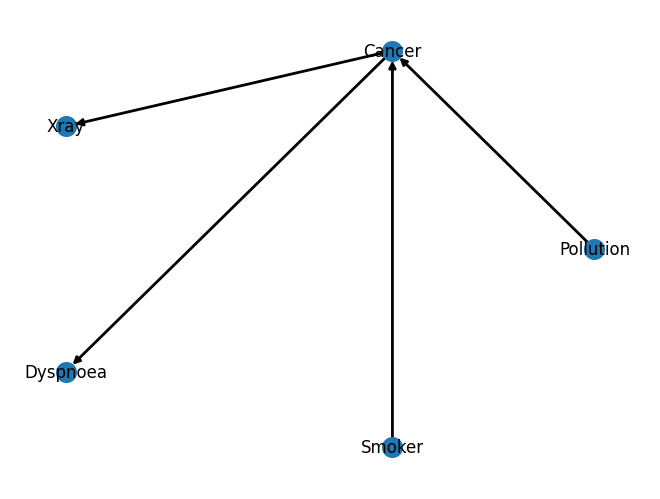

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create NetworkX graph
G = nx.DiGraph()
G.add_edges_from(list(cancer_model.edges()))

# Choose layout
pos = nx.circular_layout(G)

# Node size
node_size = 200

# Draw the graph with adjustments
nx.draw(G, pos=pos, with_labels=True, arrows=True, width=2, node_size=node_size)
plt.show()

### 2.1.3 - Define the CPDs

In a BN, each node is associated with a CPD. Therefore, for our case with 5 nodes, we need to define 5 CPDs. PGMPy provides the `TabularCPD` class to define categorical CPDs. For detailed information on the parameters of this class, please refer to the documentation: https://pgmpy.org/_modules/pgmpy/factors/discrete/CPD.html

In [4]:
from pgmpy.factors.discrete import TabularCPD

cpd_poll = TabularCPD(variable="Pollution", variable_card=2, values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable="Smoker", variable_card=2, values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(
    variable="Cancer",
    variable_card=2,
    values=[[0.03, 0.05, 0.001, 0.02], [0.97, 0.95, 0.999, 0.98]],
    evidence=["Smoker", "Pollution"],
    evidence_card=[2, 2],
)
cpd_xray = TabularCPD(
    variable="Xray",
    variable_card=2,
    values=[[0.9, 0.2], [0.1, 0.8]],
    evidence=["Cancer"],
    evidence_card=[2],
)
cpd_dysp = TabularCPD(
    variable="Dyspnoea",
    variable_card=2,
    values=[[0.65, 0.3], [0.35, 0.7]],
    evidence=["Cancer"],
    evidence_card=[2],
)

### 2.1.4 - Add CPDs to the model

After defining the model parameters, we can now add them to the model using `add_cpds`method. The `check_model` method can also be used to verify if the CPDs are correctly defined for the model structure.

In [5]:
# Associating the parameters with the model structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Checking if the cpds are valid for the model.
cancer_model.check_model()

True

### 2.1.5 - Run basic operations on the model

#### Check for d-separation between variables

In the following scenario, we have what is known as an V-structure. 
* When the value of `Cancer` is unknown, we do not have an active trail between `Pollution`and `Smoker`. **Information does not flow** (i.e., they are d-separated).
* When the value of `Cancer`is known, the path is open and we have an active trail between `Pollution`and `Smoker`. **Information flows** (i.e., they are NOT d-separated).

In [6]:
# When the `Cancer` variable is unobserved, information does not flow, i.e. both `Pollution` and `Smoker` are d-separated
print(cancer_model.is_dconnected("Pollution", "Smoker"))

# When the `Cancer` variable is observed, information flows, i.e. they are NOT d-separated
print(cancer_model.is_dconnected("Pollution", "Smoker", observed=["Cancer"]))

False
True


In the following scenario, we have an "arrow structure", thus the opposite is true (see the d-separation rules of section 1.1)
* When the value of `Cancer` is unknown, the path is open and we have an active trail between `Pollution`and `XRay`. **Information flows** (i.e., they are NOT d-separated). 
* When the value of `Cancer`is known, we do not have an active trail between `Pollution`and `XRay`. **Information does not flow** (i.e., they are d-separated).

In [7]:
# When the `Cancer` variable is unobserved, information flows, i.e., they are NOT d-separated
print(cancer_model.is_dconnected("Pollution", "Xray"))

# When the `Cancer` variable is observed, information does not flow, i.e. both `Pollution` and `Xray` are d-separated
print(cancer_model.is_dconnected("Pollution", "Xray", observed=["Cancer"]))

True
False


#### Get active trails (d-connections)


We can also identify all nodes in the network that can potentially influence a selected node through active trails (d-connections). These active trails represent pathways where information can flow directly from other nodes to the selected one.

In [8]:
cancer_model.active_trail_nodes("Pollution")

{'Pollution': {'Cancer', 'Dyspnoea', 'Pollution', 'Xray'}}

We can make certain values observed to see how the set of nodes changes:

In [9]:
cancer_model.active_trail_nodes(variables=["Pollution"], observed=["Cancer"])

{'Pollution': {'Pollution', 'Smoker'}}

#### List local independencies for a node

In [10]:
cancer_model.local_independencies("Smoker")

(Smoker ⟂ Pollution)

In [11]:
cancer_model.local_independencies("Xray")

(Xray ⟂ Dyspnoea, Smoker, Pollution | Cancer)

#### Get all conditional independence relationships expressed by the BN structure

We can estimate ALL conditional independence relationships expressed by the BN structure. These conditions are implied by the rules of d-separation.

In [12]:
cancer_model.get_independencies()

(Dyspnoea ⟂ Smoker, Xray, Pollution | Cancer)
(Dyspnoea ⟂ Xray, Pollution | Smoker, Cancer)
(Dyspnoea ⟂ Smoker, Pollution | Cancer, Xray)
(Dyspnoea ⟂ Smoker, Xray | Cancer, Pollution)
(Dyspnoea ⟂ Pollution | Smoker, Cancer, Xray)
(Dyspnoea ⟂ Xray | Smoker, Cancer, Pollution)
(Dyspnoea ⟂ Smoker | Cancer, Xray, Pollution)
(Smoker ⟂ Pollution)
(Smoker ⟂ Dyspnoea, Xray | Cancer)
(Smoker ⟂ Xray | Dyspnoea, Cancer)
(Smoker ⟂ Dyspnoea | Cancer, Xray)
(Smoker ⟂ Dyspnoea, Xray | Cancer, Pollution)
(Smoker ⟂ Xray | Dyspnoea, Cancer, Pollution)
(Smoker ⟂ Dyspnoea | Cancer, Xray, Pollution)
(Pollution ⟂ Smoker)
(Pollution ⟂ Dyspnoea, Xray | Cancer)
(Pollution ⟂ Xray | Dyspnoea, Cancer)
(Pollution ⟂ Dyspnoea, Xray | Smoker, Cancer)
(Pollution ⟂ Dyspnoea | Cancer, Xray)
(Pollution ⟂ Xray | Dyspnoea, Smoker, Cancer)
(Pollution ⟂ Dyspnoea | Smoker, Cancer, Xray)
(Xray ⟂ Dyspnoea, Smoker, Pollution | Cancer)
(Xray ⟂ Smoker, Pollution | Dyspnoea, Cancer)
(Xray ⟂ Dyspnoea, Pollution | Smoker, Cancer)
(Xr

## 2.2 - Extra: Loading example models

To quickly try out different features, PGMPy also has the functionality to directly load some example models from the [bnlearn repository](https://www.bnlearn.com/bnrepository/) 

In [13]:
from pgmpy.utils import get_example_model

model = get_example_model("cancer")
print("Nodes in the model:", model.nodes())
print("Edges in the model:", model.edges())
model.get_cpds()

Nodes in the model: ['Pollution', 'Smoker', 'Cancer', 'Xray', 'Dyspnoea']
Edges in the model: [('Pollution', 'Cancer'), ('Smoker', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea')]


[<TabularCPD representing P(Cancer:2 | Pollution:2, Smoker:2) at 0x17f9a1f30>,
 <TabularCPD representing P(Dyspnoea:2 | Cancer:2) at 0x17f9a3160>,
 <TabularCPD representing P(Pollution:2) at 0x17f9a2e90>,
 <TabularCPD representing P(Smoker:2) at 0x17f9a3b20>,
 <TabularCPD representing P(Xray:2 | Cancer:2) at 0x17f9a3b80>]